**<h2><center><font color='Green'>Studies in Astrophysics: Tsiolkovsky's Trajectory Optimization, Probabilistic Rogue Trajectory Computation and Schwarzschild's Method for Time Dilation and Theta-Light Deflection  </font></center></h2>**

**<h2><center><font color='black'>Author: Aakash Bhunia</font></center></h2>**

#### Note to the viewer: Running some of the cells would create new results which would cause inconsistencies with the reports written in the Markdown cells.

**<h1><left><font color='brown'>Introduction</font></left></h1>**

Astrophysics is a broad area of science which contains topics such as airspace engineering, stochastic variable effects and various other concepts of relativity at it's granular level. These studies aid in payload deliveries through extreme accuracy and resource optimization which involve motion simulation and fuel usage of a rocket, commencing from the launch stage to post-propulsion trajectory after separation of carrier mass– a significant amount of mathematical methods are involved. These methods are very necessary in order to not only achieve accurate directional velocity but also to reduce drag effects as much as possible.

In fact there is an entire area of study dedicated to the usage of various mathematical and statistical tools to reduce the externalities and increasing the probability of our object to follow the intended path that we have designed. This field of study is called **Motion Planning**, used very commonly in Robotics, Control Engineering and Guidance based Astrophysics.

But beyond the visibilities of the naked eye, Astrophysics also deals with how non-physical variables such as time, mass and gravity that behave normally so to speak, could change their pattern when tested under known and even unknown circumstances in space.

**This project comprises of three unrelated studies which use optimization and probabilistic methods:**

The first part will involve the understanding behind **Tsiolkovsky Rocket Equation** and combining it with an optimization algorithm which will allow us to maximize the time of rocket's trajectory through a sustainable relationship between initial rocket mass, fuel mass and exhaust velocity which tend to have an independent component behavior.

The second part will be going over a "self-destruct" algorithm of a rocket that has gone off trajectory. We will be using a hybrid machine learning and a mathematical approach to simulate multiple possibilities of mission success in an event of a "rogue trajectory". We will also attempt to compute probabilities for our decision making process for letting the "self-destruct" algorithm execute or not.

The third and the final part will discuss **Schwarzschild's Metric** for establishing relationship between Time Dilation and Theta-Light bendin effects under higher gravitational field approach. Here we will demonstrate how Theta values get arranged when we use Pymc3 Bayesian Analysis for sampling our light deflection angles if it's subjected to external factors outside our theoretically derived formula.

**<h1><left><font color='brown'>Packages Utilized</font></left></h1>**

These are the following packages we will be using in this project:

_(a) **numpy**: Required for Array based mathematical functions<br>
(b) **matplotlib.pyplot**: Necessary for graphical visualization<br>
(c) **scipy.optimize/minimize**: Used for minimization function in an optimization problem <br>
(d) **pandas**: Efficient for time series based data slicing<br>
(e) **random**: Used for importing random variables in a certain range<br>
(f) **math**: Required for basic calculations which will show up later<br>
(g) **sklearn/mean_squared_error**: This package will be used for comparing data and graph accuracy<br>
(h) **pymc3**: Used for Bayesian Analysis, sampling and graphing <br>
(i) **sklearn/MinMaxScalar**: Transforms data into a certain range for normalization which is helpful during algorithm application<br>
(j) **tensorflow/Sequential**: Required to import Sequential model for stacking layers in neural networks<br>
(k) **tensorflow/Dense**: Dense is a class which implements a function consisting of multiple operations in Neural Network layering such as activation, kernel and bias<br>
(l) **tensorflow/Dropout**: The Dropout class assists in setting frequency of rate at each step during training time in order to prevent overfitting<br>
(m) **tensorflow/Adam**: Adam is an optimizer algorithm that is a Stochastic Gradient Descent method which will be used during LSTM training process<br>
(n) **keras**: Keras package is integeral to access Artificial Neural Networks (ANNs) and will be useful for deploying our 1-dimensional convolutional network<br>
(0) **IPython/Image**: Ipython library will be utilized for embedding visualization in the Notebook_

In [28]:
from scipy.optimize import minimize
import numpy as np
import pymc3 as pm

import matplotlib.pyplot as plt
from IPython.display import Image
import random

import keras
import math
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

**<h1><left><font color='brown'>Part I: Tsiolkovsky Rocket Equation Optimization</font></left></h1>**

Named after Konstantin Tsiolkovsky, the [Tsiolkovsky Rocket Equation (TRE)](https://en.wikipedia.org/wiki/Tsiolkovsky_rocket_equation) is heavily based upon **Newton's Third Law of Motion** which states that "every action has an equal and an opposite reaction". The TRE focuses on controlling the amount of rocket fuel burn in to give our rocket an opposite angular momentum. In one way, it could be thought as a "fuel usage based jettison" technique that allows us to have a better visualization on our motion planning.

**<h3><left><font color='brown'>Background: Konstantin Tsiolkovsy</font></left></h3>**

Konstantin Tsiolkovsky is considered as one of the pioneers of astronautic theory. His works in modern rocketry and airspace engineering has certainly earned him his place alongside founding fathers such as Robert Esnault–Pelterie, Hermann Oberth and Robert H. Goddard. His Rocket Equation theory first appeared in a 1903 Russian Space innovation magazine which established the relationships among rocket velocity, speed rate of gas emission, rocket mass and it's propellant usage. Unbeknownst to him, his Rocket Equation theory became a foundation for trajectory computation and fuel planning which is used to this day. He became a major influence for Soviet Airspace Program for Sergei Korolev and Valentin Glushko who went on to design rockets and compute strategic planning for the first ever manned projects of Sputnik launch which carried Yuri Gagarin to Earth's Orbit.[$^{1}$](https://www.thespacetechie.com/konstantin-tsiolkovsky-the-rocket-equation/)

<p><center><img src="https://www.nasa.gov/sites/default/files/konstantin-tsiolkovsky.jpg" width= 400></center></p>

<h1><center><font color='blue'>Konstantin Tsiolkovsky </font></center></h1>
<h30><center><font color='blue'>Picture Source:NASA Images</font></center></h30>

**<h3><left><font color='brown'>Tsiolokovsky's Boat Experiment</font></left></h3>**

<p><center><img src="https://upload.wikimedia.org/wikipedia/commons/2/29/Exp%C3%A9rience_de_Tsiolkovsky.gif" width= "1000"></center></p>

<h10><center><font color='blue'>Picture Source:WikiMedia</font></center></h10>

Tsiolokovsky's boat experiment was a way to show the jettison effect of loss of mass which results in propelling the boat in the opposite direction with a commensurate velocity growth.

The experiment was as follows: 

A boat is loaded with a certain amount of rocks and is placed in the middle of a sea away from the shore without any oars in order to avoid any directional bias. The person who is onboard starts offloading a rock one after other on the right side and this results in the boat moving on the left side (the opposite direction). We see that the uni-directional velocity of the boat increasing steadily (proportionate to the mass) holding the center of gravity (COG) constant. This is due to the aforementioned Newton's Third Law of motion and we also see that mass of the boat reducing at the same time which increases the rate of change of velocity of boat over time. 

We can see the animation of the boat above which shows the directional propulsion and as well as this aforementioned increase in velocity due to the loss of mass.

**<h3><left><font color='brown'>Components of Tsiolokovsky's Equation</font></left></h3>**

There are numerous ways in which Tsiolokovsky's rocket equation could be derived. In our case, we will use the standard momentum and relative momentum formulas inspired by the derivation in *University Physics Vol.1* by Sanny et al.

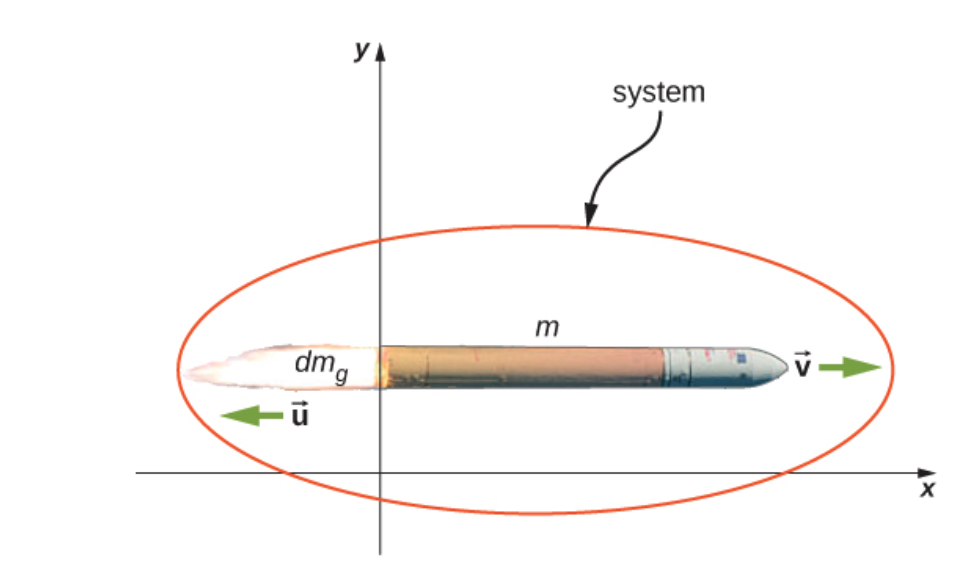

In [19]:
from IPython.display import Image
Image(filename="Desktop/Rocket.png",width=900,height=100)

We start by derivation of the equation where we can see the mass of the rocket with the fuel mass as _m_ at any given point of time with an instantaneous velocity $v^{\to } = vî$ such that the rocket moves in a positive-x direction along the axis (with respect to the Earth) with an initial momentum of the system:

$$\Rightarrow p_{i}^{\to } = m.v$$
$$\Rightarrow p_{i}^{\to } = m.v.î$$

Now to see the direction of movement of the gases of the rocket. The mass of the rocket gas is defined as $m_{g}$ such that the rate of change of gas is denoted by $dm_{g}$ at a velocity of $u^{\to } = -uî$ such that the gaseous mass moves in a negative-x direction along the axis (with respect to the rocket as opposed to the rocket as we saw earlier) and therefore, the velocity of the gas is: $vî-uî = î(v-u)$

So during time t or one cycle of the process the mass of the rocket decreases by $dm_{g}$ and the velocity increases by $dvî$. So computation of the final momentum of the system would be:

$$\Rightarrow P_{f}^{\to } = P_{rocket}^{\to } + P_{gas}^{\to }$$
$$\Rightarrow P_{f}^{\to } = (m-dm_{g})(v+dv)î+dm_{g}(v-u)î$$

We can continue to work on this analytical solution but we can drop the vector notation given that the rocket and the gas moves in a uni-directional plane. When we apply conservation of momentum:

$$\Rightarrow p_{i} = p_{v}$$
$$\Rightarrow mv = (m-dm_{g})(v+dv)+dm_{g}(v-u)$$
$$\Rightarrow mv = mv + mdv -dm_{g}v-dm_{g}dv+dm_{g}v-dm_{g}u$$
$$\Rightarrow mdv = dm_{g}dv+dm_{g}u$$


However, the rate of change of gaseous product and as well as rate of change of velocity on a general scale are small numbers independently and much smaller numbers when a product of theirs has been taken. Therefore, we can ignore the first term which gives us:

$$\Rightarrow mdv = dm_{g}u$$

We must remind ourselves here again that the term $dm_{g}$ represents a decrease in the mass of rocket such that we can write this out as:

$$\Rightarrow dm_{g} = -dm$$

with replacing the term:

$$\Rightarrow mdv = -dmu$$
$$\Rightarrow dv=-u\frac{dm}{m}$$

Now we can apply an limited anti-derivative which goes from initial mass of the rocket $m_{i}$ to final mass $m$ providing us with:

$$\Rightarrow \int_{v_{i}}^{v}dv = -u\int_{m_{i}}^{m}\frac{1}{m}dm$$
$$\Rightarrow v-v_{i}=u\ln(\frac{m_{i}}{m})$$

This finally gives us the **Tsiolokovsky's Equation** which provides us with a non-linear equation and change of mass over time from $m_{0}$ to m $$\Delta v=u\ln(\frac{m_{i}}{m})$$[$^{2}$](https://courses.lumenlearning.com/suny-osuniversityphysics/chapter/9-7-rocket-propulsion/#:~:text=mim)

The terms are:

u = Exhaust Velocity

$m_{i}$= Initial Mass or Wet Mass

m= Final Mass or Dry Mass

**<h3><left><font color='brown'>Setting up a Tsiolkovsky Optimization Function</font></left></h3>**

Let's consider a Tsiolkovsky based Optimization Problem where we are designing a rocket such that the rocket's orbital stay is influenced by factors such as exhaust velocity rate, size of dry mass of the rocket and weight of the fuel at a given time period. 

We will be using an interesting engineering problem to demonstrate this optimization from _Optimization Methods for Engineering Design_ (**Hendengeren et al.**). The following conditions and accompanying coefficients come from the Saturn class NASA rockets which requires us to maximize trajectory time such that:

$$\max R - C_{f}-C_{d}-C_{ex}$$


$$R = 550 \Delta v$$

where, $$\Delta v=u\ln(\frac{m_{i}}{m})$$

$$ C_{f} = 4.154(m_{i}-m)$$
$$C_{d}=154.36m$$
$$C_{ex}=75u$$

Here, R is the Revenue equation where we want to have TRE maximized while $C_{f}$, $C_{m}$ and $C_{ex}$ which are the fuel mass, dry rocket mass and exhaust velocity rate respectively that need to be minimized.

There are additional boundary based constraints of certain variables such that:</br>
(i) The Dry Mass ($m$) need to be at least 20,000 Kilograms.</br>
(ii) The Core Tsiolkovsky's formula or $\Delta v$ needs to be between 9.4 Km/s to 20.2 Km/s (boundary inclusive). </br>
(iii)The Exhaust Velocity $u$ needs to be between 2.5 Km/s to 4.5 Km/s(boundary inclusive). </br>
(iv) The initial mass of the rocket or the wet mass is guessed to be between 1,750,000 Kilograms to 2,750,000 Kilograms which includes the fuel mass.


Therefore, the optimization problem we get is:</br>

$$\max 550\Delta v - 4.154(m_i-m) -154.36m-75u $$ </br>


$$s.t: m \ge 20,000$$
$$\Delta v \le  20.200$$
$$\Delta v \ge 9.400$$

$$u \le 4.500$$
$$u \ge 2.500$$

We can further analytically solve the objective function:


$$\max 550u\ln(\frac{m_i}{m_i-q_t})-4.154(m_i-(m_i-q_t))-154.36(m_i-q_t)-75u $$ </br>

Notice we do two things:

1) We plug back the Tsiolkovky's equation in place of $\Delta v$
2) We replace m with ($m_i$ - $q_t$) where $q_t$ is the rate of gas at a particular time period or in other words the rate at which the rocket loses mass. At any given time m = $m_i$ - $q_t*t$ but we will be doing our optimization problem at time t=1 after which the trajectory of the rocket takes place. 

So if we keep on solving the objective function we get:

$$\max 550u\ln(\frac{m_i}{m_i-q_t})-154.36m_i-75u+150.206q_t$$

And all the constraints could be re-written as:

$$m_i-q_t \ge 20000$$

$$u\log(\frac{m_0}{m_0-q_t})\le 20.200$$

$$u\log(\frac{m_0}{m_0-q_t})\ge 9.400$$

With Two Bounded Constraints:

$$ 2.5 \le u \le 4.5 $$  

$$ 1,750,000 \le m_i \le 2,750,000 $$

**<h3><left><font color='brown'>Trajectory Computation</font></left></h3>**

**Below we create a function which returns us the 3-dimensional graph after we use an "SLSQP" optimization function since only an SLSQP function can apply both bounds and constraints on an objective function at the same time. Here are the steps descirbed as labeled below:**

**<h3><left><font color='brown'>Step 1:</font></left></h3>**

We define our function using the lambda loop given that we need to optimize 3 different variables. We also define our constraints and bounds of our function. Notice that we have to maximize our function and usually we would just extract the function value and multiply it by -1 i.e. minimize the negative function to find the max value. However, in this case it doesn't matter because we just need to find the variable quantities whose signs remain unchanged.

In [2367]:
#Step 1

from scipy.optimize import minimize
import random



fun = lambda x: ((550*x[0]*np.log(x[1])/(x[1]-x[2]))-154.36*x[1]-75*x[0]+150.206*x[2])
    
cons = ({'type': 'ineq', 'fun': lambda x:  -x[1] + x[2]+ 0*x[0]+20000},
       {'type': 'ineq', 'fun': lambda x:  x[0]*(np.log((x[1])/(x[1]-x[2])))-20.200},
       {'type': 'ineq', 'fun': lambda x:  -x[0]*(np.log((x[1])/(x[1]-x[2])))+9.400})
    
bnds= ((2.500,4.500),(1750000,2750000),(3800,4000))

**<h3><left><font color='brown'>Step 2:</font></left></h3>**

We define our 3 guess values for the exhaust velocity (u), initial rocket mass ($m_i$) and the change in rocket mass ($q_t$) due to fuel consumption over time – all of which need to go into the minimize function. Here we take an arbitrary boundary for the rocket fuel mass which shouldn't exceed more than 4000 $Kg^3$. It's important to note that the mass of rocket fuel has been made arbitrary since changing it by a big margin will considerably change our optimized trajectory given it's sensitivity to our function. Furthermore, the guess values have been put within a randomized normal function in order to provide us with different variable combinations to simulate the type of trajectory and the apogee we want.

In [2368]:
#Step 2

g1=random.uniform(2.500,4.500)
g2=random.uniform(1750000,2750000)
g3=random.uniform(3800,4000)
    
x0=(g1,g2,g3)
    
res = minimize(fun, x0, method='SLSQP', bounds=bnds,constraints=cons,tol=1e+160)

**<h3><left><font color='brown'>Step 3:</font></left></h3>**

We apply our minimize function from the scipy library to find our results for the 3 unknowns and extract them from the numpy array accordingly. Now we apply our trajectory function such that we take into consideration Newton's second law of motion and with a position vector such that we get a non-angular convex trajectory function:

$$ V(t) = x_0+ut+\frac{1}{2}gt^2+[\frac{v_0}{q}(550v_0\log(\frac{m_i}{m_i-qt}-154.36m_i-75v_0+150.206qt)] $$

Such that initial position defined as x0 is 0 Km, initial velocity defined as iv is 0 Km/s and acceleration due to gravitational drag is 9.8 m/$s^2$.

Notice that the Tsiolokovsky's equation is multipled by a factor which is the ratio of velocity exhaust to fuel mass to provide us with a change in velocity due to mass as the rocket moves.

In [2369]:
mi = res["x"][1]
q  = res["x"][2]
vo = res["x"][0]
t=np.arange(0,int(mi/q))
x0=0
iv=0
g=9.8
    
def v(t):
    return x0 + iv*t + 0.5*g*t**2+(550*vo*np.log(mi/(mi-q*t))-154.36*mi-75*vo+150.206*q*t)*(vo/q)

**<h3><left><font color='brown'>Step 4:</font></left></h3>**

Finally we get to plot our optimized trajectory with the following variables: exhaust velocity which increases linearly over time, trajectory that we calculated in step 3 and the time parameter for the trajectory to reach it's apogee. We plot all of these on a 3-dimensional graph and print our results.

The Rocket achieves pre-orbital launch apogee at T+642 from Launch site!
Topological Correction: -0.44706639578820073 units
Initial Rocket Mass: 2799.4326030870357 Tons
Fuel Mass: 4.349563212984472 Tons
Average Rocket Velocity: 0.44432547977312525 Units per Second


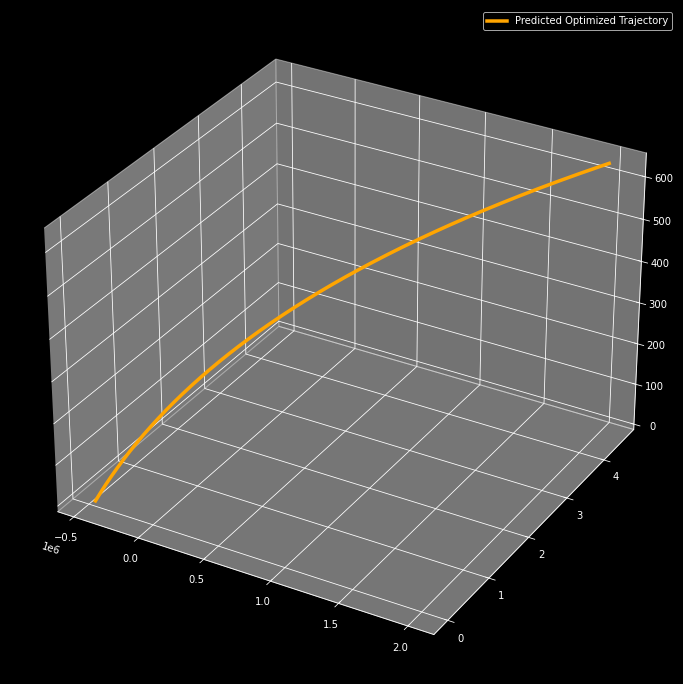

In [2370]:
%matplotlib inline
plt.style.use('dark_background')
fig = plt.figure(figsize=(12,15))
ax = plt.axes(projection='3d')
    
yline = np.linspace(0,vo,int(mi/q))
xline = v(t)
zline = np.arange(0,int(mi/q))
ax.plot3D(xline, yline, zline, 'orange',linewidth=3.5, label ="Predicted Optimized Trajectory")
    
plt.legend()
    
print(f"The Rocket achieves pre-orbital launch apogee at T+{zline.max()} from Launch site!")
print(f"Topological Correction: {xline.min()/1e6} units")
print(f"Initial Rocket Mass: {mi/907.19} Tons")
print(f"Fuel Mass: {q/907.19} Tons")
print(f"Average Rocket Velocity: {(1e6)**(-1)*(np.sum(xline))/(zline.max())} Units per Second")

**<h3><left><font color='brown'>Interpretation of Results</font></left></h3>**

Once we finally compute our trajectory we have some interesting data that we receive from our algorithm. Before we proceed to discuss these values, it's important to keep in mind that this is a non-angular trajectory formula which means that it can only provide us with the time stamp and the rate at which it takes for the rocket to reach it's pre-orbital apogee. Notice that we use the term "pre-orbital" because it's not necessarily the mission apogee and usually pre-orbital is loosely termed as "outer-space". 

The values we achieve from this computation are as follows:

(1) We find that we achieve our pre-orbital apogee at the time stamp of T+642 or about 10 minutes and 42 seconds approximately which is a standard expectation of Saturn Class rockets which typically tend to take anywhere between 9 minutes to 11 minutes to reach their pre orbital apogee. So our rocket definitely passes this test!

(2) Due to non-angularity trajectory calculation we see that our rocket simulation doesn't necessarily start at the Zero coordinate ($0^{\circ }0'0''$). Usually anguarity of a rocket is determined on the basis of factors such as the geolocation and the altitude of the launch site, weather conditions ,the type of orbit that we want our rocket to take and even potential low orbit electromagnetic disturbance. In our scenario we assume that we have a $0^{\circ}$ plane from where we launch and expect the rocket to move, so if we want to actually have such a trajectory, then it's safe to move the launch site by approximately 0.45 units due west in order to avoid an unprecedented overshoot if we have a certain geospatial coordinate that we want to attain at T+642.

(3) To gain a trajectory as such with an average rocket velocity of approximately 0.45 units/sec our optimization functions recommends us to use a rocket with an initial mass of 2799.43 Tons or about 2.53 Million Kilograms which contains 4.35 tons of fuel or about 3946 Kilograms. These are standard numbers expected from any rocket designed to reach pre-orbit trajectory. 

**<h1><left><font color='brown'>Part II: Flight Termination Protocol or the "Self-Destruct" Algorithm</font></left></h1>**



Now that we done a succesful trajectory let's talk about the alternative scenario where the rocket goes "rogue", which means that prior to achieving pre-orbital trajectory the rocket deviates and there are a lot of reasons to explain it. It could be due to a systems failure or even low pressure mechanical interference and it's quite common to see these things happening in test rockets or simulations. 

In a situation where the mission control detects a model rocket going rogue and off-trajectory, they will have a crucial decision to make. A rocket by itself will initiate a self-destruction sequence the moment it's off trajectory but the mission control can stop it if they think that the rocket has the capacity to change it's directional velocity to go back on-course and/or finish it's apogee at an acceptable altitude away from the predicted simulation and that's why they set something called the "breach-points". These breach points are usually a range within which a rocket's trajectory is allowed to be deviated before the mission control starts making a decision if a rogue rocket needs to be subjected to a self-destruction. We will go more over these breach points shortly! 

If the rocket is simulated to reach the breach-point with a certain statistical confidence, then something called the Flight Termination Protocol (FTP) is given a go-ahead and the rocket is self-destructed before it reaches the breach point to reduce chances of surface level damage by having the maximum mass of the rocket to disintegrate in atmosphere.

<p><center><img src="https://media.npr.org/assets/img/2021/09/03/ap21246642096510-9a73554e7b029714b20bb407b28556b1151f205e-s800-c85.webp" width= 800></center></p>

**<h2><center><font color='blue'>Unmanned Rocket Firefly Alpha Initiates FTP  </font></center></h2>**
<h30><center><font color='blue'>Picture Source: NPR</font></center></h30>

**<h3><left><font color='brown'>Methodology</font></left></h3>**

Since the rogue motion of a rocket is a randomized movement of the rocket around a planned motion, we will equivalently apply a "controlled randomized" method for predictions necessary.

We will apply a hybrid algorithm which utilizes a combination of Convolutional Neural Network (CNN) and a Geometric Brownian Motion (GBM) which gives us future values of v(t) which shows units covered during the trajectory over a given course of time.

**<h3><left><font color='brown'>Background on Geometric Brownian Motion</font></left></h3>**

Brownian Motion has an interesting origin long before it was used in stock market price. Originally, Brownian Motion was discovered in 1827 by a biologist named Robert Brown when he noticed a "jittery" motion in the pollens he was studying. The randomness of this jittery process was formalized later as The Brownian Motion.

Brownian motion is a stochastic **Weiner Process W(t)** with values in $ \mathbb{R} $ defined for t $\in $ [0,$\infty$] where the probability density function of W(t) is defined as f<sub>W(t) </sub>(x) =  
 
 ##                    $$ \frac{1}{\sqrt[]{2t\pi}}e^{-\frac{{x^{2}}}{2t}}$$


#### The following are some features of Brownian Motion which helps us to understand it from a theoretical standpoint: <br>
_(a) Brownian Motion over time (B<sub>t </sub>) is a Gaussian Process where $\forall$ 0 $ \leq $ t<sub>1</sub> $ \leq $ t<sub>2</sub> $ \leq $ ... $ \leq $ t<sub>k</sub> the random vector $ \mathbb{Z} $ = (B<sub>t<sub>1 </sub> </sub>,...,B<sub>t<sub>k </sub> </sub>) $\in$ $ \mathbb{R} $ has a multinormal distribution._

_(b) B<sub>t </sub> has a stationary incremental feature where the process (B<sub>t+h</sub>-B<sub>t</sub>)<sub>h $\geq$ 0 </sub> has the same distribution $\forall$ t; thus, E(B<sub>t+h</sub>-B<sub>t</sub>) = 0 and Var(B<sub>t+h</sub>-B<sub>t</sub>)= h_

_(c) B<sub>t </sub> has a continuous path however it can't be differential at any point._

_(d) Brownian Motion is a Martingale Process such that |E(B<sub>t </sub>)| < $\infty$ $\forall$ t_

_(e) Cov(B<sub>s </sub>,B<sub>t </sub>) = min(s,t)_

(Ermogenous, 2006)

A simple Brownian Motion is a Random Walk model that describes a path that consists of a succession of random steps on a defined mathematical space of integers. On a simpled 1-Dimensional Random Walk Process at time $t{{W_{n}(t)}}>0$ we see that: <br>

1. The initital value of the process: W<sub>n</sub>(0)=0
2. The layer spacing between two successive jumps is equal to 1/n
3. The "up" and "down" jumps are equal and of size $1/\sqrt{n}$ with equivalent probability

**But in a Geometric Brownian Motion, we have a random walk model with such features and added to that we implement a stochastic portion called the Wiener Process.**

Named after the famous American Mathematician Norbert Wiener, the Wiener Process is a continuous-time stochastic process. The added stochastic process is often considered the standard Brownian Motion which was originally observed by Robert Brown. 

A Wiener Process W<sub>t</sub> is characterised by the following properties:

**1. W<sub>0</sub> = 0; this is an event assumed to happen surely as if it happens on a probability of 1. In other words, the set of possible exceptions may be non-empty but has a probability that can be argued to be a Lowest Upper Bound of 0.**

**2. W has independent increments: for every t > 0, the future increments W<sub>t+u</sub> - W<sub>t</sub>, u>= 0, are independent of the past values W<sub>s</sub>, s > t.**

**3. W has Gaussian increments: W<sub> t+u </sub> - W<sub>t</sub> is normally distributed with mean 0 and variance u, W<sub> t+u </sub> - W<sub>t</sub>N(0,u).**

**4. W has continuous paths: With probability of 1, W <sub> t</sub> is continuous in t.**

The process has independent increments means that if 0<= s<sub>1</sub> < t <sub> 1 </sub> <= s<sub> 2 </sub>< t<sub> 2 </sub> which makes $W_{t_{1}}-W_{s_{1}}$ and $W_{t_{2}}-W_{s_{2}}$ are independent random variables, and the similar condition will hold for n increments.(Hull,2022) <br>

To simulate single Brownian increment W<sub>i</sub> at one fixed time increment is computed by multiplying a standard random variable z <sub> i </sub> from a normal distribution N(0,1) with mean 0 and standard deviation 1 by the square root of the time increment $\sqrt{\Delta t_{i}}$. <br>

#### $$\Delta W_{i}=z_{i}\sqrt{\Delta t_{i}}$$

This cumulated sum of the Brownian increments is the discretized Brownian Motion path. Below we will start out by modelling the Brownian Motion wehere we generate standard random variables from the Normal Distribution N(0,1).[$^{3}$](https://advancesindifferenceequations.springeropen.com/articles/10.1186/s13662-018-1466-5https://advancesindifferenceequations.springeropen.com/articles/10.1186/s13662-018-1466-5)

**<h3><left><font color='brown'>Background on 1D Convolutional Neural Network (CNN)</font></left></h3>**


Let's consider the case of how a 1D convoluted network will be applied for our trajectory data prediction. As seen below, the CNN 1D method would take a matrix of our observed values which will be our input and take a product with a filter matrices on different layers to provide us with a Convoluted Feature or also known as output features which will consist of our rocket's rogue prediction under this method. 

Our input shape would be of (k,1) matrix shape or the the amount of k period of time steps we must take to look into the rogue trajectory future. Simply put, we will look into the last k time periods of observed trajectory again to produce the next unobserved trajectory path.

Higher the amount of k periods we use as time steps to produce unobserved values, the higher predictibility we can achieve. However, we must be careful here to not enter into any overfitting problems by taking very high k values.

It's important to note that this input shape is a one dimensional matrix array, so we can think of it as a set of observed k scalar vectors in the input.

<p align="center">
<img src="https://media.giphy.com/media/i4NjAwytgIRDW/giphy.gif" width= "600" >
</p>
<h35><left><font color='black'>Picture source:Giphy</font></left></h35>

However, in the above illustration what we have is an image based CNN which explains the basic dimensionality and filter based approach to a CNN. But perhaps a better representation of the workings of a 1D CNN convolving over time could be seen in the illustration below where multiple features convolve by one spot in a certain matrix formation over time.

**In our case, we will apply our 1D CNN on a univariate time series model (we will have only one feature) which keeps moving to the right in batches of k to produce the next value. Therefore, our input matrix during process implementation will be of (k,1).**

<p align="center"><img src="https://www.macnica.co.jp/business/ai_iot/columns/image5_2.png" width= "600" ></p>
<h35><left><font color='black'>Picture source:Macnica Japan</font></left></h35>

**<h1><left><font color='brown'>Computing Predictions</font></left></h1>**

Let's first start by doing a pruning on our original data set that we previously used to plot our trajectory. As a rehash, these values were the trajectory values, time parameter and the exhaust velocity. However in our pruning process we will only use the trajectory values and the time parameter only since the exhaust velocity grows linearly.

However in the prediction process we will only use the trajectory values since time period will go linearly along with it. 

**<h3><left><font color='brown'>Step 1</font></left></h3>**

We have a total of T+642 trajectory values or 642 prediction points. We will first prune the data such that we work on the first T+582 observations or the first 582 data points which leaves us with 60 data points left to be predicted.

The strategy that this project will adopt is such as this: we will predict the first 30 points using CNN method and the last 30 points using Brownian Motion **after the CNN data is appended** which gives us an equal weight on the Machine Learning and the Geometric Brownian Motion part of our algorithm.

We start out by first importing packages that are necessary for our Machine learning part for developing our algorithm.

Now, we do the following things:

1) Prune the data as mentioned earlier and extract the first 582 data points. We will only work with the trajectory values for our machine learning predictions.

2) Scale the entire data which means all values have been proportionately reduced to values between 0 to 1 so that we can increase time efficiency of our CNN model to predict our values. We proceed to the next step after reshaping the matrix.

3) Separate the train and test sets in a 65:35 split.

4) Create a data preprocessing function which will help us convert our array of values into a dataset matrix which is necessary for our CNN algorithm to compute the predictions for our datasets of train, test and our validation sets. Here, we also get to choose our time step as 10, which is basically the algorithm looks back 10 previous values to provide us with our next predicted value.

5) Finally, we apply our model with a "relu" activation function with an "adam" optimizer. There are three layers of neural networks with 64 neurons each. These numbers chosen are arbitrary as more we increase the neurons values for each layer, the computation time of our computer will increase drastically. We also choose our total epochs to be 30, which means we will have 30 computations to provide us with our results. Note, the environment for our epochs has been made silent using the verbose argument.

In [2371]:
#Prune Data
x=xline[:582]
y=zline[:582]


#Data Scale
scaler=MinMaxScaler(feature_range=(0,1))
data_cnn=scaler.fit_transform(np.array(x).reshape(-1,1))


#Constructing a train,test split on the data 65:35 split
training_size=int(len(data_cnn)*0.65)
test_size=len(data_cnn)-training_size
train,test=data_cnn[0:training_size,:],data_cnn[training_size:len(data_cnn),:1]
training_size,test_size

#Data preprocessing
#Converting an array of values into a dataset matrix

def create_dataset(dataset,time_step):
    dataX,dataY=[], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]  ###i=0, 0,1,2,3...29
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

#we choose time step size as 30
time_step=10
X_train,y_train = create_dataset(train,time_step)
X_test,y_test= create_dataset(test,time_step)

model = keras.Sequential([
    layers.Conv1D(64, 1, activation="relu", input_shape=(time_step, 1)),
    layers.Conv1D(64, 1, activation="relu"),
    layers.Conv1D(64, 1, activation="relu"),
    layers.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(30, activation="relu"),
    layers.Dense(1),
])

model.compile(optimizer='adam', loss='mse')

#Applying the model with a silent epoch environment

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=64,verbose=0)

 **<h3><left><font color='brown'>Step 2</font></left></h3>**
 
 Once we have our CNN model computed we start doing certain checks to see our accuracy of our predictibility. We see that the training data set has an approximately 0.0005 RMSE score while the test data set has a 0.008 score (approx.) which means our predictions are more than accurate. This shouldn't come as a surprise since our trajectory data is relatively smooth and free of variance. The question that one might be asking is that if this could skew our objective of creating variance or the rogueness of our trajectory due to overfitting but stay tuned since in the latter steps when we apply our Brownian motion which will generate our randomness.

In [2372]:
#Prediction values at pre-performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

#RMSE scores
math.sqrt(mean_squared_error(y_train,train_predict)),math.sqrt(mean_squared_error(y_test,test_predict))

(0.0005392812465665436, 0.00792149805955411)

 **<h3><left><font color='brown'>Step 3</font></left></h3>**
 
This step involves mostly looping through our ouput to extract the 30 values which we predicted using the CNN algorithm. We also subsequently plot our findings  and we can see that we have relatively got a smooth prediction as expected with some minute turbulence in the data. Remember the data points are still scaled down so we need to inverse transform them!

In [2373]:
x_input=test[int(len(test)-time_step):].reshape(1,-1)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

#Predictions for the next 30 time steps

lst_output=[]
n_steps=time_step
i=0
while(i<30):
    
    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} time input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} time output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.98671794]
11
1 time input [0.97525634 0.97833254 0.98141353 0.9844993  0.98758986 0.99068522
 0.99378536 0.99689028 1.         0.98671794]
1 time output [[0.9889472]]
2 time input [0.97833254 0.98141353 0.9844993  0.98758986 0.99068522 0.99378536
 0.99689028 1.         0.98671794 0.98894721]
2 time output [[0.9885388]]
3 time input [0.98141353 0.9844993  0.98758986 0.99068522 0.99378536 0.99689028
 1.         0.98671794 0.98894721 0.9885388 ]
3 time output [[0.9902362]]
4 time input [0.9844993  0.98758986 0.99068522 0.99378536 0.99689028 1.
 0.98671794 0.98894721 0.9885388  0.99023622]
4 time output [[0.99030024]]
5 time input [0.98758986 0.99068522 0.99378536 0.99689028 1.         0.98671794
 0.98894721 0.9885388  0.99023622 0.99030024]
5 time output [[0.9916273]]
6 time input [0.99068522 0.99378536 0.99689028 1.         0.98671794 0.98894721
 0.9885388  0.99023622 0.99030024 0.99162728]
6 time output [[0.99217]]
7 time input [0.99378536 0.99689028 1.         0.98671794 0.98894721 

**<h3><left><font color='brown'>Step 4</font></left></h3>**

Below we plot the CNN predicted 30 variables which range from T+582 to T+612 after inverse transforming them. What we have created here is a sudden drop of the rocket's trajectory after T+581. This drop will cause the rocket to initiate the self-destruct sequence on it's own unless halted. As mentioned before the mission control will have to make a decision between T+582 and T+612 to either let the self-destruct sequence to go on or halt it on the basis of the simulations that we do in the next steps. 

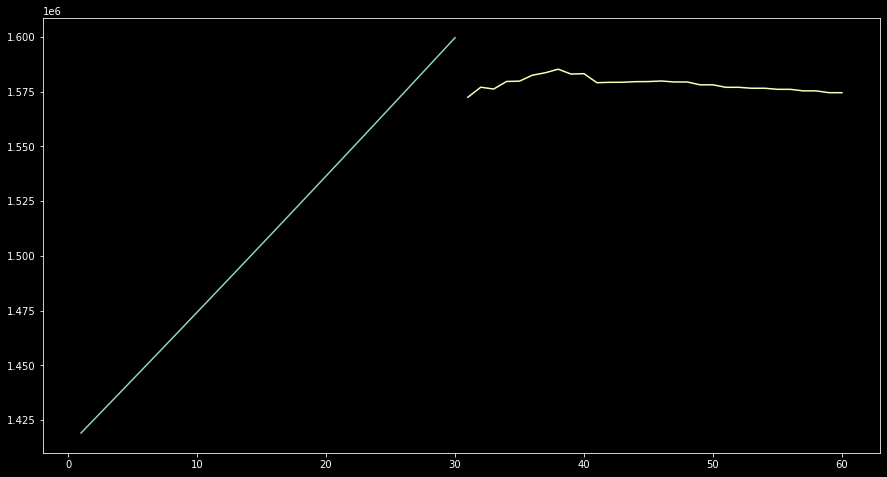

In [2543]:
new=np.arange(1,31)
pred=np.arange(31,61)

fig = plt.figure(figsize=(15,8))
plt.plot(new,scaler.inverse_transform(data_cnn[552:]))
plt.plot(pred,scaler.inverse_transform(lst_output))

**<h3><left><font color='brown'>Step 5</font></left></h3>**
 
 Finally, we arrive at a crucial step within CNN, which is the preparation of our data before subjecting it to Geometric Brownian Motion. We append the predictions to the original pruned data in a numpy array format. We can see that the array has 612 variables (582+30:pruned+CNN predicted variables). Now we can move on to our next step!

In [2381]:
actual_pred=pred,scaler.inverse_transform(lst_output)

data_pd=pd.DataFrame(actual_pred).transpose()
data_pd.columns=["Time Period","v(t)"]
data_pd.drop(["Time Period"],axis=1,inplace=True)
data_pd["v(t)"]=data_pd["v(t)"].str.get(0)
data_pd=data_pd.to_numpy().reshape(30,)

In [2382]:
data_actual=pd.DataFrame(x)
data_actual=data_actual.rename(columns={0:"v(t)"})

In [2383]:
data_actual=data_actual.to_numpy().reshape(582,)

In [2914]:
pre_brown_data=np.concatenate((data_actual,data_pd))
pre_brown_data.shape

(612,)

 **<h3><left><font color='brown'>Step 6: Applying GBM</font></left></h3>**
 
 
In this step we will be applying our aforementioned theory of Geometric Brownian Motion or GBM as one single master function. We apply this function in order to loop the function and create simulations later on. Here are the steps we take:

1. Parameterizing the time increment (T), the number of steps (N) we look back  and the seed value for our random vector to compute our GBM.

2. Setting up coefficient values which are uniformally distributed between -1 to 1 to provide a controlled stochasticism to our mean and variance value on which the core GBM function depends on. 

3. Defining our Weiner function which is a Stochastic Differential Equation (SDE) component to our core GBM function which we apply in the next step.

4. Defining the core GBM function and make sure that we can append the predicted values in a data set.

5. Allocating starting value of our equation, mean, standard deviation, the Weiner Process variable, total time step. We apply these values to our GBM function which makes use of our weiner function before arriving at our final data set which comprises of the 30 variables which are predicted using GBM.

In [2557]:
data=pre_brown_data
T=1
N=50
seed=50

def master_function(T,N,seed,data):
    
    d = T / N
    t = np.arange(0.0, 1.0, d)
    data_fd=pd.DataFrame(data).pct_change()
    data_fd=data_fd.dropna()
    
    coeff1=random.uniform(-1, 1)
    coeff2=random.uniform(-1, 1)
    
    mu = coeff1*data_fd.mean()
    sig =coeff2*data_fd.std()
    
    def BrownianMotion(seed, N):
        np.random.seed(seed)
        Z = np.random.randn(N)     #random variables
        Z[0] = 0
        dW = np.sqrt(d)* Z        #single Brownian increment
        
        W = np.cumsum(dW)          #Brownian path
        
        return W
    
    def GBM_Exact(So, mu, sigma, W, N, t):
        
        S = []
        S.append(So)
        
        for i in range(1,N):
            
            drift = (mu - 0.5 * sigma**2) *t[i]       #Calculating the deterministic part
            diffusion = sigma * W[i-1]                #Calculating the stochastic part
            S_i = So * np.exp(drift + diffusion)
            S.append(S_i)
            
        return S
    
    So = data[612-N:613-N]
    
    mu = mu
    sigma = sig
    W = BrownianMotion(seed, N)
    
    t = np.linspace(0., T, N)
    
    compiled_solution = np.array(GBM_Exact(So, mu, sig, W, N, t))
    compiled_solution=np.reshape(compiled_solution,(N,))
    compiled_solution=compiled_solution[N-30:]
    
    final_data=np.concatenate((data,compiled_solution))
    
    return final_data

**<h3><left><font color='brown'>Step 7</font></left></h3>**

We generate 1000 simulations of our function. It's important to remember that at every iteration we will have different values given that there are normally distributed random variables and as well as random seed values at play in the GBM formula which gives us different trajectories that we need.

In [2792]:
sims=1000
l=list(map(lambda x: master_function(T,N,seed,data),range(sims)))
df=pd.DataFrame(np.array(l).T)

Below we plot our visuals in both 2-Dimensional and 3-Dimensional graph. Notice we get all these simulation only after the CNN has been computed since the CNN represents the start of rocket variance from the simulated trajectory before it goes rogue.

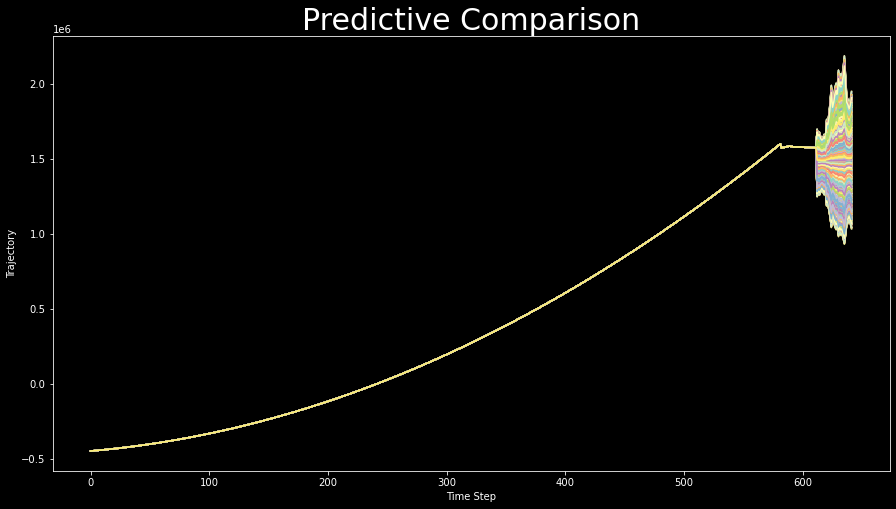

In [2793]:
fig = plt.figure(figsize=(15,8))
for i in np.arange(0,sims,1):
    plt.plot(np.arange(0,642,1),df[i])
    plt.xlabel("Time Step")
    plt.ylabel("Trajectory")
    plt.title("Predictive Comparison",fontsize=30)

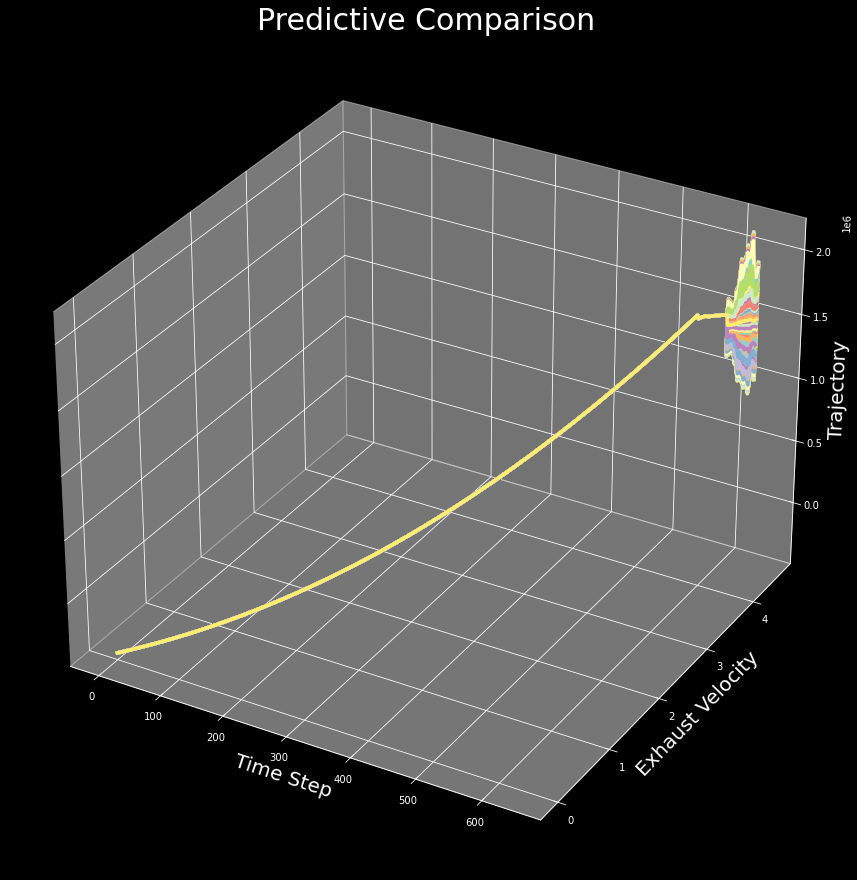

In [2897]:
   
%matplotlib inline
plt.style.use('dark_background')
fig = plt.figure(figsize=(15,20))
ax = plt.axes(projection='3d')

for i in np.arange(0,sims,1):
    x=np.arange(0,642,1)
    y=df[i]
    z=np.linspace(0,4.5,642)
    
    ax.plot3D(x,z,y,linewidth=3.5, label ="Simulations")
    
    ax.set_xlabel('Time Step', fontsize=20, rotation=150)
    ax.set_ylabel('Exhaust Velocity',fontsize=20)
    ax.set_zlabel('Trajectory', fontsize=20, rotation=60)
    plt.title("Predictive Comparison",fontsize=30)

In the above graphs, due to high number of simulations it is very difficult to make a certain guess for the next 30 time stamps and therfore it's well advised to move to a probabilistic scenario to see if we can filter the possibilities where we can get back to our intended trajectory.

**<h3><left><font color='brown'>Step 7: Computing Probabilities and Scenario Stress Testing</font></left></h3>**

This is a chance where we get to learn more about breach points in a rocket's trajectory. Now a rocket is undoubtedly a very sensitive transport vehicle and even the tiniest unprecedented shift in instrument or external conditions can move the trajectory by hundreds of miles in either direction but usually rockets do have a back up "self-correction program" which gets initiated as a trigger the moment the ground control thinks that self-destruction wouldn't be necessary. Self Correction program puts the rocket into an autopilot mode which prioritizes the best possible return to trajectory by the least allowable fuel tradeoff per unit time.

But the self-correction program will fail to work the moment the rocket is out of a certain standard deviation around it's harmonic mean. If the rocket is outside the range (regardless of being closer or farther from the ground), the best option would be to self destruct it. However, this decision has to be made in advance as discussed before.

In our case the rocket has a total time stamps of T+642 but at the T+582 the rocket shows a sudden but harmless altitude drop (CNN prediction) which starts a countdown for the rocket to execute it's Flight Termination Protocol (FTP). So between T+582 and T+612 ( a total of 30 time-stamps) the mission control has to make the decision to let the rocket execute FTP or not on the basis of a custom real time probability. Now GBM has given 1000 simulations or 1000 different possibilities in which the rocket will move and our goal in this step is to find the probability or the number of trajectories where the rocket has a stable path enough after T+612 for our Self-Correction program to take over.

We start out by computing the harmonic mean. The Harmonic mean is usually used in problems such as these which involve smooth data observations on a vector-direction formula. The Harmonic Mean formula is given by:

# $$\frac{n}{\sum_{}^{}\left[ \frac{1}{x_i} \right]}$$

where n= total observations and $x_i$ are the observations.




1. We allow for a randomized standardizes deviation such that it has a random variable, normally distributed between 1 and 1.2. Using this we create our upper and lower bounds. 

2. Next we compute the probabilities of our trajectory to be between the upper and lower bound by finding the standard deviation and harmonic mean at every step which we plug into our formula that utilizes the set theory formula:

#### $$A\cap B=n(A)+n(B)-n(A\cup B)$$

where,

**In case 1:**

$n(A)$ = Number of values in a time stamp given the trajectory scenario which is lower than the upper bound </br>
$n(B)$ = Number of values in a time stamp given the trajectory scenario which is more than the lower bound </br>
$n(A\cup B)$ = The Union or the total number of possible variables in our sample space which is 1000 in this case </br>

You will notice below we are able to generate a total of 30 probabilities in this case, 1 each for every time stamp.

**In case 2:**

$n(A)$ = Number of values for a trajectory given the time stamp which is lower than the upper bound </br>
$n(B)$ = Number of values for a trajectory given the time stamp which is more than the lower bound </br>
$n(A\cup B)$ = The Union or the total number of possible variables in our sample space which is 30 in this case </br>

You will notice below we are able to generate a total of 1000 probabilities in this case, 1 each for every trajectory simulation.

Note that all the probabilities extracted using these process are in percentages for easier understanding.

**<h3><left><font color='brown'>Case 1: Probability of success during a time stamp given rocket trajectory</font></left></h3>**

In [3088]:
from scipy.stats import hmean

df[612:].T.astype(int)
mylist=[]

for n in np.arange(612,642,1):
    stdev = np.std(df[n:n+1].T)
    harmonic_mean =hmean((df[n:n+1].T))
    
    rate = random.uniform(1.0,1.2)
    
    ub= int(harmonic_mean+rate*stdev)
    lb = int(harmonic_mean-rate*stdev)
    
    mylist.append(100*(int((df[n:n+1].T > lb).sum())+int(((df[n:n+1].T < ub).sum()))-1000)/1000)

vals1= np.array(mylist)
vals1.shape

(30,)

Below we plot the histogram for case 1 and we see that there is a lot of scattering of our distribution however the highest probability is around the 66% probability mark for our data.

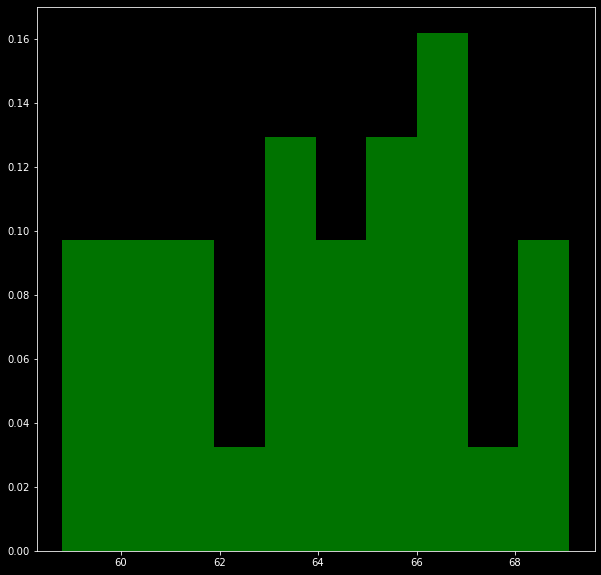

In [3129]:
fig = plt.figure(figsize=(10,10))
colors = ['green', 'blue', 'lime']
plt.hist(vals1, bins = 10,label = "Histogram of Case 1", color = "green", alpha = 0.9,  density = True)
plt.show()

**<h3><left><font color='brown'>Case 2: Probability of success during a trajectory given the time stamp</font></left></h3>**

In [3072]:
from scipy.stats import hmean

df[612:].T.astype(int)
mylist=[]

for n in np.arange(0,1000,1):
   
    rate = random.uniform(1.0,1.2)
    
    ub =  rate*np.std(df[612:])[n] + hmean(df[612:])[n]
    lb = -rate*np.std(df[612:])[n] + hmean(df[612:])[n]
    
    mylist.append(((int((df[612:][n] < ub).sum())+int((df[612:][n] > lb).sum()) - 30)/30)*100)

vals2 = np.array(mylist)
vals2.shape

(1000,)

Below we plot our histogram for Case 2 and there is a better shape to it in terms of lesser scattering in comparison to case 1. We see the distribution to be centered at the 65% mark but majority of the distribution lies between 53% and 66% approximately.

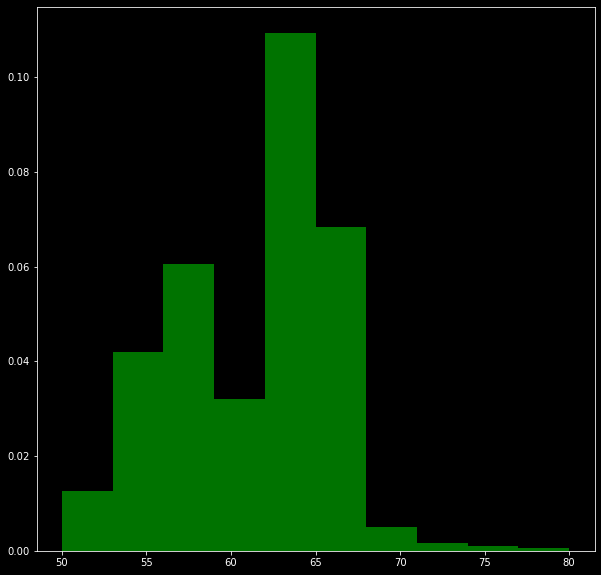

In [3125]:
fig = plt.figure(figsize=(10,10))
colors = ['green', 'blue', 'lime']
plt.hist(vals2, bins = 10,label = "Histogram of Case 1", color = "green", alpha = 0.9,  density = True)
plt.show()

**<h3><left><font color='brown'>Results</font></left></h3>**

Now we are going to us the Dirichlet's random function from NumPy library to provide us with a set of random numbers (30 random numbers for probabilities in case 1 and 100 random numbers for probabilities in case 2) . These numbers are the weights that we will use to find the weighted average of all the probabilities that were computed in both cases. Here are couple of assumptions and steps that we are working with:

1. These weight numbers are first extracted and are arranged into a descending order under the assumption that the accuracy of our probabilities fall by each time step in the first case and the accuracy of our GBM algorithms waver way too much as we go further into the number of simulations. In short, we assume that the numbers we start out predicting have a higher accuracy than the numbers we predict in the tail end. 

2. We assume that the weights are distributed in the form of a Dirichlet's distribution such that a vectors x fullfil condition $x_i$ > 1 where $\sum_{i=1}^{k}x_i=1$. The probability density function for a Dirichlet Distribution is defined as: 

## $$p(x)  \propto \prod_{i=1}^{k} x_i^{\alpha-1}$$

where $\alpha$ is defined as a vector containing the positive concentration parameter. So if a variable Y is a random vector which has standard gamma distribution components then:

## $$X =\frac{1}{\sum_{i=1}^{k}Y_i}Y$$

[$^{3}$](https://numpy.org/doc/stable/reference/random/generated/numpy.random.dirichlet.html)

3. To arrive at our weighted average we apply NumPy's matmul function between the arrays of our probabilities and weights to print our results.

In [3093]:
rand30=-np.sort(-np.random.dirichlet(np.ones(30)))
rand1000=-np.sort(-np.random.dirichlet(np.ones(1000)))

prob1= round(np.matmul(vals1,rand30),2)
prob2= round(np.matmul(vals2,rand1000),2)

print(f"The probability of success given the rocket is in the range at a time stamp is {prob1}%")
print(f"The probability of success that the number of times rocket will be within the range during the entire time period is {prob2}%")

The probability of success given the rocket is in the range at a time stamp is 64.45%
The probability of success that the number of times rocket will be within the range during the entire time period is 60.9%


**<h3><left><font color='brown'>Interpretation of Results</font></left></h3>**

Now we get to see here two different probabilities:

1. The first one which gives us the probability that the rocket will be between the given standard range at every time step for each trajectory has as success of 64.39%.

2. The second one which gives us the probability that the rocket will be between the given standard range at every trajectory for each step has a success of 60.9%

Now both the probabilities have their own pros and cons that we need to consider before making the decision:

**For Case 1:**

1. Pro: In this case we have a "clean probability" such that the probability value reflects the number of trajectories that will remain in the range within a particular time stamp is 64.45%

2. Con: There are only 30 probabilities which reflect such a "clean probability" and due to this lack of data points as a result of lesser time steps in comparison to our number of simulated trajectories we cannot really have a very high confidence in this probability. Furthermore, the histogram seems to have an almost uniform distribution as well.

**For Case 2:**

1. Pro: In this scenario we have 1000 probabilities (a large sample) and has mathematical rigor when it comes to our approach for finding the probability in a more non-generalized manner.

2. Con: There is a risk element attached to it. Having a 60.9% probability means that the rocket will remain within that standard range for about 60.9% during the entire 30 time stamp period. 


Even though both the probabilities have a 355 basis point gap (still quite significant!) in the end it really comes up to the question of what do we prioritize in taking our decision: Do we want overall trajectory accuracy of the rocket to be paramount to mission success (Case 1) or do we want the per time unit trajectory accuracy to be more necessary?

Computing probabilities in rocket science are much more complex indeed but the key factor to note is that to achieve a perfect trajectory without any bumps along the way is much more harder as we look at these probabilities!

**<h1><center><font color='brown'>Part III: Schwarzschild Metric, Time Dilation Factor and Theta-Light Deflection under Gravity</font></center></h1>**

In this final part of the project we will explore the concept of Time Dilation and Theta-Light Deflection under Schwarzchild's method when there is an object of high mass causing high gravitational field. 

We will be applying some relevant parts of the Schwarzschild Metric which contains formulas for Time Dilation Factor and Light Deflection and use these formulas to establish a working theoretical relationship between these two.

**<h3><left><font color='brown'>Background: Karl Schwarzchild</font></left></h3>**
    
Karl Schwarzschild was a German physicist who is considered to be one of the most prolific theorists in the field of astronomy. He utilized Einstein's core theory of General Relativity to devise critical solutions of the existence of Black Holes in an era where Black Holes were considered a theoretical myth, making his theoretical foundations key to this date in understanding effects of topological-gravitational pull, numerical computation of speed-time dilation and Light deflection.

His first model of a black hole, even though disproved, was critical to establishing "simple black holes" which held mass but had no electrical charge or spin attached to it. Of course black holes are now know to not only spin and have a light and sound element to them but also emit strong radiations which further dilate time on the basis of distance of an object famously known as the "Hawking Radiation".

<p><center><img src="https://upload.wikimedia.org/wikipedia/commons/0/05/Karl_schwarzschild.portrait.jpg" width= 400></center></p>

<h1><center><font color='blue'>Karl Schwarzschild </font></center></h1>
<h30><center><font color='blue'>Picture Source:WikiMedia</font></center></h30>

**<h3><left><font color='brown'>Computation of Time Dilation and Light Bending Effect</font></left></h3>**

Let's start working on a theretical basis of our formulas. The first formula we will transform is the Schwarzchild's equation for Time Dilation which is defined as :

## $$\gamma = \frac{T_e}{T_{obj}} $$

such that:</br> $T_e$ = Time Dilation on earth</br>
$T_{obj}$ = Time Dilation in the gravitational field of the planetary object </br>

The ratio of these variables help us in understanding the relativity of time in an easier numerical intuition. We can further write the formulas out:

## $$\gamma = \frac{\sqrt{1-\frac{2GM_{e}}{R_{e}c^2}}}{\sqrt{1-\frac{2GM_{obj}}{R_{obj}c^2}}}$$

**where,**</br> 
$M_e$ = Mass of Earth </br>
$M_{obj}$ = Mass of the planetary object </br>
$R_e$ = Radius of Earth </br>
$R_{obj}$= Radius of the Object </br>

$c$ = Speed of Light under vaccum and no gravitational field </br>
$G$ = Universal Gravitational Constant: $6.6743*10^{-11}$ $m{^3}$K$g^{-1}$$s^{-2}$ </br>

Thankfully we can actually compute $T_{e}$ which reduces our equation down to:

### $$\gamma = \frac{0.99}{\sqrt{1-\frac{2GM_{obj}}{R_{obj}c^2}}}$$

We start solving for the Mass:

$$\frac{\gamma}{0.99} = \left[\sqrt{1-\frac{2GM_{obj}}{R_{obj}c^2}}  \right]^{\frac{-1}{2}}$$

$$\Rightarrow\left[\frac{0.99}{\gamma}  \right]^{2} = 1-\frac{2GM_{obj}}{R_{obj}c^2}$$

$$\Rightarrow \frac{2GM_{obj}}{R_{obj}c^2}  = 1-\left[\frac{0.99}{\gamma}  \right]^{2}$$

$$\Rightarrow M_{obj}  = \frac{(R_{obj}c^2)}{2G}\left[ 1-\left[\frac{0.99}{\gamma}  \right]^{2} \right]$$

We can apply the initial $\gamma$ value as a ratio to simplify the formula such that:

$$\Rightarrow M_{obj}  = \frac{(R_{obj}c^2)}{2G}\left[ 1-T_{obj}  ^{2} \right]$$

[$^{4}$](ijsrp.org/research-paper-0914/ijsrp-p3334.pdf)

We will come back to using this derivation very soon!

**Now we are going to introduce the Theta Light Deflection fomula which is defined by:**

## $$\theta = \frac{4GM}{r_{0}c^{2}}$$

where,

$\theta$ = Angle of deflection</br>
$M$=Mass of the Planetary object </br>
$r_0$=Distance of closest approach to gravitaional field of the mass  </br>
$M$=Mass of the object</br>
$G$=Universal Gravitational Constant </br>
$c$=Speed of Light

So simply, we will apply the mass of the object in this equation to move forward with our computation

$$\theta = \frac{4GM_{obj}}{r_{0}c^{2}}$$

[$^{5}$](https://arxiv.org/abs/1409.7812)

$$\theta = 2.97*10^{-27}\frac{M_{obj}}{r_{0}}$$

This relationship may seem to be asymptoting to 0 initially but the Mass of planetary objects are huge to offset this numerical insignificance. </br>

Below we demonstrate an example of what happens when a light is in a 10000 mile vicinity of sun's centre of gravity given that sun's mass is $1.9891 * 10^{30}$ Kilograms.

In [3132]:
M_sun = 1.9891*10**30
r0=10000
G= 6.6742 *(10**(-11))
c_squared=299792458**2

Theta = (G/c_squared)*(M_sun/r0)
Theta

0.14771154074081289

We see that the light will bend by approximately $0.148^{\circ}$ if the light is in a 10000 mile gravitational vicinity of sun. However, it's not so simple as you can imagine since stars are much more complex plantary objects in comparison to planets since they have a temperature, sound and radiation effect on light. Lot of different models have tried to account for light deflection but much is yet to be known.

However, we can simulate how theta can actually be different. Suppose we find the theta values of 1000 different stars which have a range of mass varying from 8.1% to 1400% the mass of the Sun. These bounds are based upon real suns where EBLM J0555-57Ab is the lightest sun located 670 light years away from the Earth in the Pictor Constellation while the upper bound being Stephenson 2-18 which is about 14 times that of our sun.

We apply a randomize our thetas such that the theta values are bigger than our theoretical values by about 7 to 10% given various other factors influencing light deflection as mentioned before under the assumption that this additional external variance increase as the mass increases and therefore we put the random values in the ascending order. We will keep our distance factor $r_{0}$ fixed at 10000 miles. 

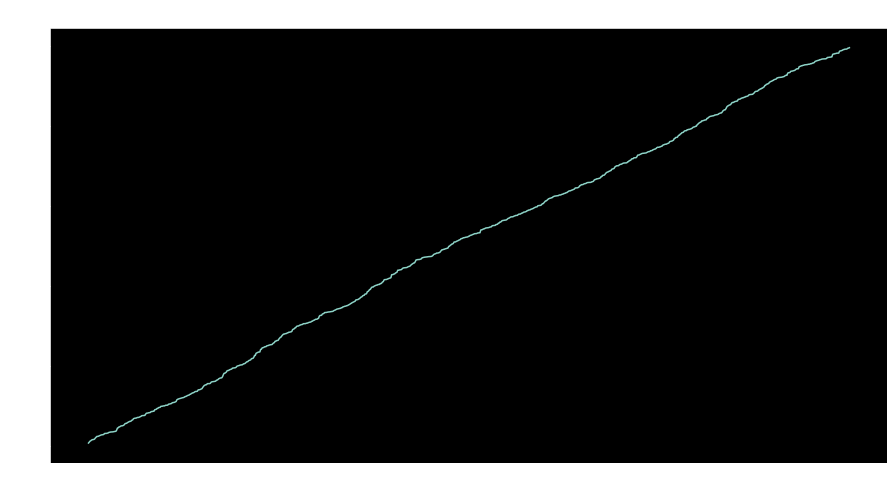

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(15,8))

lists = []
lists2 = []
for m in np.linspace(0.081,14,1000):
    M_sun = m*1.9891*10**30
    G= 6.6742 *(10**(-11))
    c_squared=299792458**2
    
    r0=10000
    
    lists.append(M_sun)

Masses = np.array(lists)
var_thetas= ((4*G*M_sun)/(r0*c_squared))+((4*G*M_sun)/(r0*c_squared))*(np.sort(np.random.uniform(0.07,0.1,1000)))

plt.style.use('dark_background')

plt.plot(Masses,var_thetas)
plt.xlabel("Mass of the Object")
plt.ylabel("Theta Deflection ")

plt.title("Mass-Deflection Relationship",fontsize=20)

plt.show()

**<h3><left><font color='brown'>Bayesian Appproach on Theta Deflection and Planetary Mass Relationship</font></left></h3>**

Clearly we can see that there is a direct relationship with the Mass of the object and Theta Deflection of the light in a 10,000 mile vicinity however our equation does become limiting since it becomes sound in theory but maybe not so much in application. 

We could convert the core relationship equation between the theta and the mass into a relationship of theta, radius of the object and time dilation of the object but the time dilation formula will contain the radius factor which would lead to a multicolinearity bias as radius will influence the time dilation variable. Therefore, we will just proceed with a simple one variable regression.

Let's assume we arrive at these distorted theta values without the usage of our random uniform tool which inhibits us from knowing more about these value through our Mass-Light Deflection relationship which established before. This allows us to create a function and apply Bayesian sampling through PyMC3 package and model it. The function we will be applying is as follows:

## $$\theta_i=m_i + \sigma\varepsilon_t$$

### $$\sigma= 2.5$$

### $$\varepsilon \sim  N(0,1.0)$$

such that: </br>

1. $\theta_i$: Actual theta values which include the 7 to 10% variance as discussed before.
2. $m_i$ : The Mass based theta function of the object.

Below we apply our pymc3 model as an object where the prior and likelihood values are normally distributed values of our observed data. Our posterior will sample 10000 values from our observed data and will do these samplings or chains 15 times independently to improve the robustness of our model without losing time-efficiency for the model to calculate our values. We all set the tune parameter to 2000 which means we led the chain converge to the distribution of our model for 1000 iteration. Once the 2000 iterations are complete the package will start drawing from our distribution. This process is called "burn-in" where the first few samples are tuned out to get the model in the thought process for the approach it should take for the remaining of the iterations that we have selected.

We see below that it takes approximately 136 seconds to finish 18000 Bayesian samplings of our model.

In [47]:
import pymc3 as pm

m = pm.Model()

with m:
    # Observed data
    data = pm.Data("data", var_thetas)

    # Priors
    theta_i = pm.Normal("theta_i", 0, 1)

    # Likelihood 
    obs = pm.Normal("obs", theta_i, 2.5, observed=data)
    
with m:
    # Posterior
    trace = pm.sample(10000,cores=15,tune=2000)

/Users/aakashbhunia/opt/anaconda3/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 15 jobs)
NUTS: [theta_i]


Sampling 15 chains for 2_000 tune and 10_000 draw iterations (30_000 + 150_000 draws total) took 136 seconds.


In [48]:
std = np.std(trace["theta_i"])
mu = np.mean(trace["theta_i"])
mu,std

(8.921489880367556, 0.07823502784946933)

**<h3><left><font color='brown'>Interpreting the Results</font></left></h3>**

Now we proceed with finding the mean of all samples we get using the trace function of our model such that it provides us with mean of our theta deflection which is approximately 8.92 with a standard deviation of 0.078. 

Here, we see a smaller standard deviation given that our mass function (which comprises the core of our $\theta_i$) doesn't move by a big factor for our theta values to change significantly, therefore our histogram shows a normal distribution but is a little bit more squeezed as evidenced below.

Text(0.5, 1.0, 'Sampled Histogram')

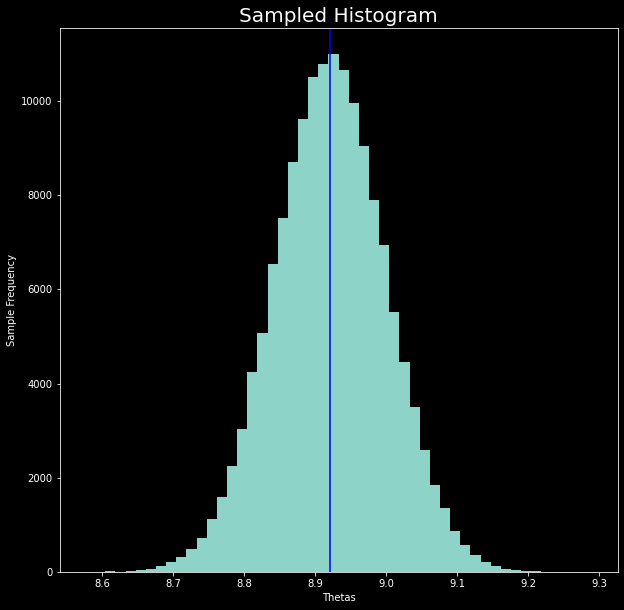

In [49]:
from scipy.stats import norm

plt.figure(figsize=(10, 10))

std = np.std(trace["theta_i"])
mu = np.mean(trace["theta_i"])


plt.xlabel("Thetas")
plt.ylabel("Sample Frequency")

plt.axvline(mu,color="b",label="Mean")
plt.hist(trace["theta_i"], bins=50);
plt.title("Sampled Histogram",fontsize=20)

We further analyze our results using the traceplot function of the pymc3 package which gives us a distribution graph on the left of all the 15 chains and on the right we get to see the convergence of samples for all chains on the right handside.

Clearly there is a normal distribution as mentioned before with all the chains agreeing more or less on the outcome of the mean of our sample. However, we do see a little bit of a disturbance at the mean perhaps caused by granular differences in the graph on the left.

When it comes to checking the stationarity of our samples in terms of per markov chain, we see that the values do tend to cluster around 8.9 to to 9.0 with highest variances seen at sample mark of 4000 and 8000 approximately.

<ipython-input-50-d94f65ca24f6>:3: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, figsize =(20,10))
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/aakashbhunia/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


<Figure size 720x720 with 0 Axes>

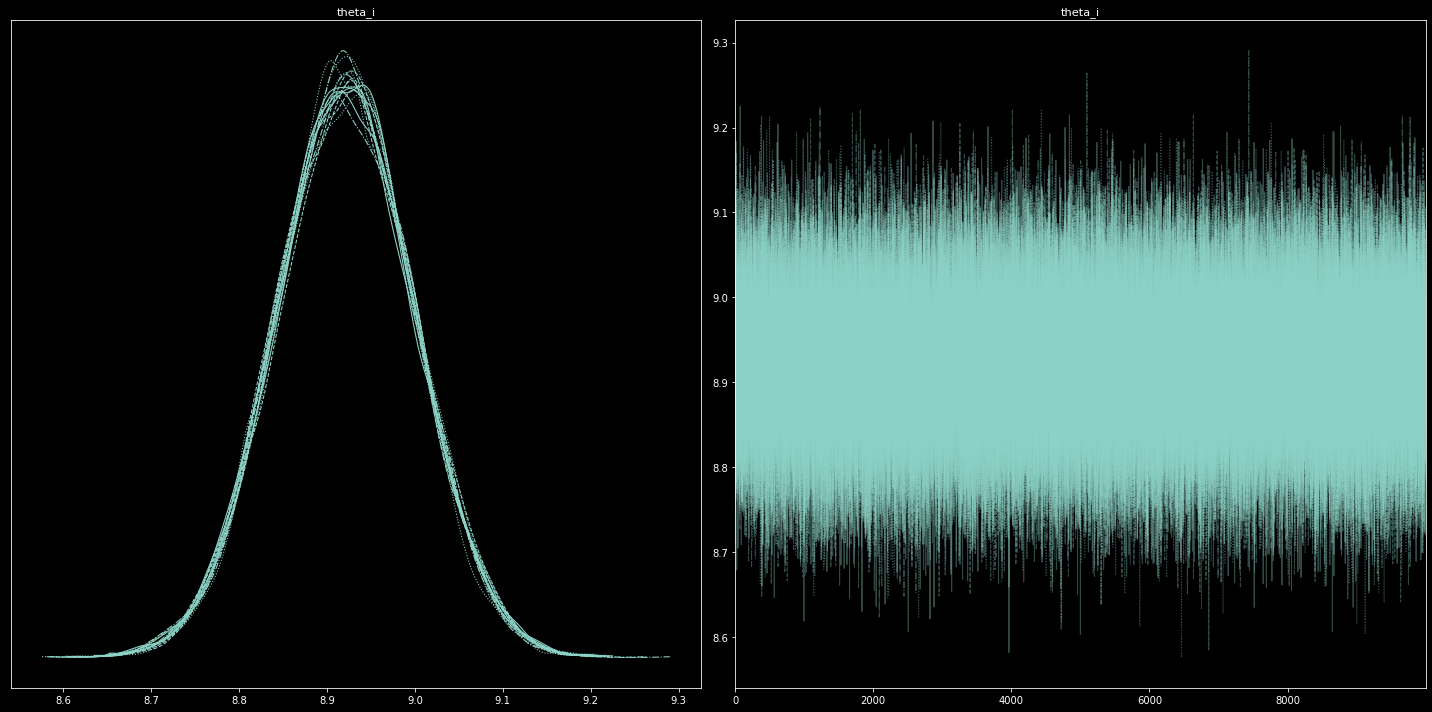

In [50]:
plt.figure(figsize=(10, 10))

pm.traceplot(trace, figsize =(20,10))
plt.tight_layout()

**<h3><left><font color='brown'>Bayesian Approach on Time-Dilation and Light Deflection Relationship</font></left></h3>**

Let's go back to the equation for Time dilation subjected to Mass:
$$\Rightarrow M_{obj}  = \frac{(R_{obj}c^2)}{2G}\left[ 1-T_{obj}  ^{2} \right]$$

We will invoke the Main Sequence Star rule where Mass and Radius have a relationship such that Radius $\alpha$ Mass$^{0.8}$ and use this in our equation to find the value of Time Dilation.[$^{8}$](https://www.daviddarling.info/encyclopedia/M/mass-radius_relation.html#:~:text=The%20mass%2Dradius%20relation%20is,%2C%20then%20R%20%3D%20M%200.8.)

$$\Rightarrow M_{obj} = \frac{M_{obj}^{0.8}c^{2}}{2G}\left[ 1-T_{obj}^{2} \right]$$

$$\Rightarrow M_{obj}^{0.2} = \frac{c^{2}}{2G}[1-T_{obj}^{2}]$$

$$\Rightarrow M_{obj}^{0.2} = \frac{c^{2}}{2G}-\frac{c^{2}}{2G}T_{obj}^{2}$$

$$\Rightarrow M_{obj} = \left[ \frac{c^{2}}{2G}[1-T_{obj}^{2}] \right]^{5}$$


We bring back our theta light deflection formula which hass our Mass of the object in it and then plug our derivation to obtain our Time Dilation to Light Deflection formula:

$$\theta = \frac{4GM_{obj}}{r_{0}c^{2}}$$

$$\Rightarrow \theta = \frac{4G}{r_{0}c^{2}}\left[ \frac{c^{2}}{2G}[1-T_{obj}^{2}] \right]^{5}$$

$$\Rightarrow \theta = \frac{4G}{r_{0}c^{2}}\ (\frac{c^{2}}{2G})^{5}[1-T_{obj}^{2}] ^{5}$$

## $$ \theta = \frac{c^{8}}{8r_{0}G^{4}}[1-T_{obj}^{2}] ^{5}$$

Now that we have established a relationship between the two variables we plot them in a graph such that the Time Dilation of an object from 0.0001 to 0.001. 0.0001 could be as time moves 0.0001% slower on the planetary mass than compared to Earth interpreted. We appply and extract 200 data points where we can clearly see a high sensitivity among the data where a minute change in time dilation is a huge change in the angle at which the light deflects.

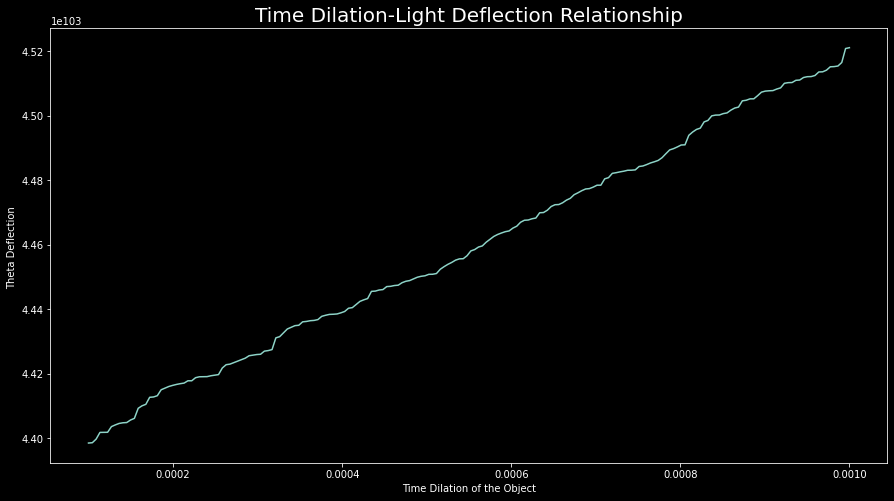

In [74]:
r0=10000
G= 6.6742 *(10**(-11))
c_squared=299792458**2

mylists=[]

for t in np.linspace(0.0001,0.001,200):
    theta=((c_squared**4)/((8*r0*G**4))*((1-t**2)**5))
    mylists.append(theta)
j = np.array(mylists)

data = j +(np.sort(np.random.uniform(0.07,0.1,200)*j))

fig = plt.figure(figsize=(15,8))
plt.style.use('dark_background')

plt.plot(np.linspace(0.0001,0.001,200),data)
plt.xlabel("Time Dilation of the Object")
plt.ylabel("Theta Deflection ")

plt.title("Time Dilation-Light Deflection Relationship",fontsize=20)

plt.show()

We see a clear positive relationship here between Time Dilation of the Object and Theta Deflection of light given that they both have an impact from Mass but Time Dilation will have a a large impact on thetas value as radius of the planetary mass is also in play in the background and therefore we see huge deflection of light. However, it must be noticed that in comparison to the previous plot of the relationship between Mass and Theta Deflection the graph here has a little bit more of a variance in the data.

To start our Bayesian Analysis we begin with reduction and converting them into smaller degrees.

In [75]:
lists=[]
for i in np.linspace(0,199,200):
    j=data[int(i)]
    k = int(data[int(i)])
    lists.append((k*10**(-102)/360)*360)
data=np.array(lists)
data.shape

(200,)

After we have done our reduction we apply 10000 similar parameters that we applied we create our Bayesian Priors, Likelihood and posterior to continue:

## $$\theta_i=t_i + \sigma\varepsilon_t$$

### $$\sigma= 2.5$$

### $$\varepsilon \sim  N(1000,2000)$$

such that: </br>

1. $\theta_i$: Actual theta values which include the 7 to 10% variance as discussed before.
2. $t_i$ : The Time Dilation function which provides us with the theta values.


Notice that we keep our standard deviation for our priors very high in order to encompass the high sensitivity in our data.

In [76]:
m = pm.Model()

with m:
    # Observed data
    data = pm.Data("data", data)
    
    # Priors
    theta_i = pm.Normal("theta_i", 1000, 2000)

    # Likelihood
    obs = pm.Normal("obs", theta_i, 2.5, observed=data)
    
with m:
    # Posterior
    trace = pm.sample(10000,cores=15,tune=2000)

/Users/aakashbhunia/opt/anaconda3/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (15 chains in 15 jobs)
NUTS: [theta_i]


Sampling 15 chains for 2_000 tune and 10_000 draw iterations (30_000 + 150_000 draws total) took 147 seconds.


In [77]:
std = np.std(trace["theta_i"])
mu = np.mean(trace["theta_i"])
mu,std

(44.5943329018202, 0.17711433726792722)

The mean of the distribution is approximately 44.6 and the standard deviation is 0.18 approximately which renders us with a histogram that has a normal distribution with a small standard deviation and therefore we get a squeezed histogram.

Text(0.5, 1.0, 'Sampled Histogram')

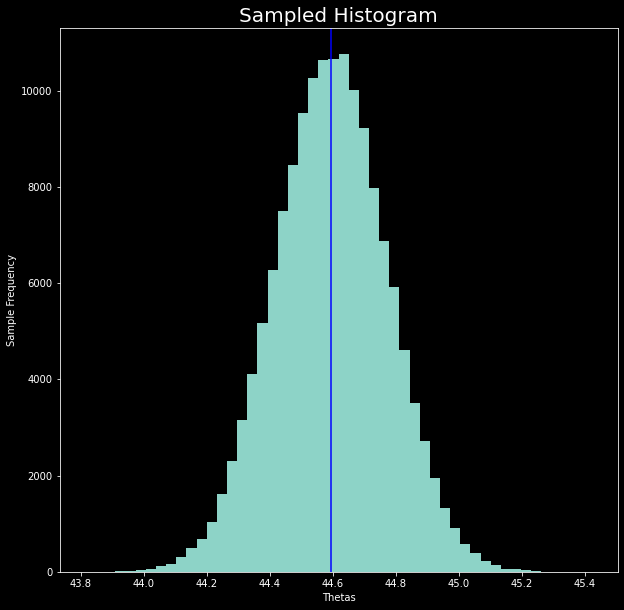

In [78]:

plt.figure(figsize=(10, 10))

std = np.std(trace["theta_i"])
mu = np.mean(trace["theta_i"])


plt.xlabel("Thetas")
plt.ylabel("Sample Frequency")

plt.axvline(mu,color="b",label="Mean")
plt.hist(trace["theta_i"], bins=50);
plt.title("Sampled Histogram",fontsize=20)

<ipython-input-79-d94f65ca24f6>:3: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, figsize =(20,10))
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/aakashbhunia/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


<Figure size 720x720 with 0 Axes>

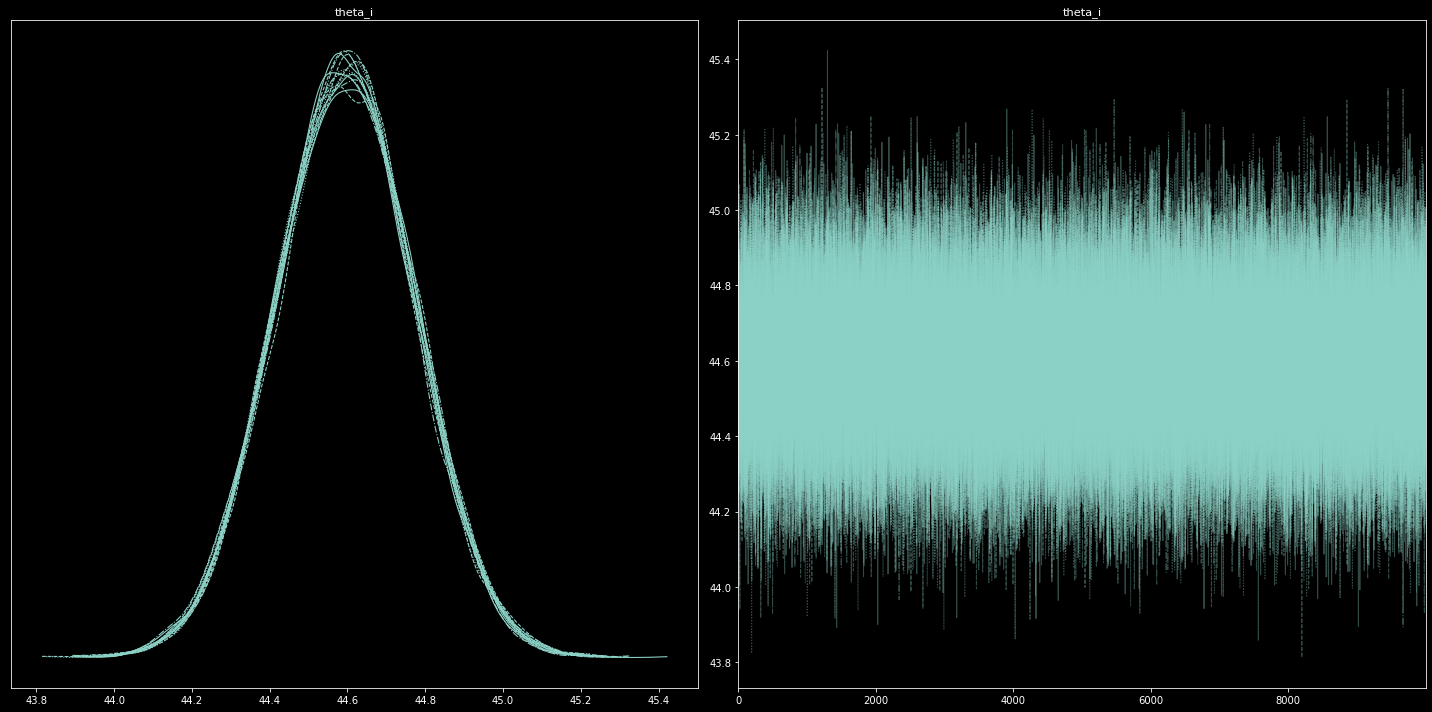

In [79]:
plt.figure(figsize=(10, 10))

pm.traceplot(trace, figsize =(20,10))
plt.tight_layout()

We further analyze our results using the traceplot function of the pymc3 package which gives us a distribution graph on the left of all the 15 chains and on the right we get to see the convergence of samples for all chains on the right handside.

Clearly there is a normal distribution as mentioned before with all the chains agreeing more or less on the outcome of the mean of our sample. However, we do see a little bit of a disturbance at the mean perhaps caused by granular differences in the graph on the left.

When it comes to checking the stationarity of our samples in terms of per markov chain, we see that the values do tend to cluster around 44.4 to to 44.8 and although we see some sort of high variance throughout our data.

**<h1><left><font color='brown'>Conclusion</font></left></h1>**

One of the most famous astronomical models is called the Lambda-CDM model of the universe which includes an underlying Theory of Cosmic Inflation by Alan Guth [$^{6}$](https://arxiv.org/pdf/2112.04510.pdf). The theory states that if the universe started expanding after $10^{-37}$ seconds after the Big Bang occurence and is growing at a speed faster than the light(73 Km per sec per megaparsec $\pm$ 1), contradicting Einstein's concept of general relativity the entire universe is 150 Sextillion times larger than the Observable Universe (or 21 zeros after 150)! That is the definition of the vastness of the field of astrophysics and astronomy–rife with unimaginable possibilities.[$^{7}$](https://lambda.gsfc.nasa.gov/education/graphic_history/univ_evol.html)

<p><center><img src="https://lambda.gsfc.nasa.gov/education/graphic_history/images/Universe_Timeline_2016_720.jpg" width= 800></center></p>

<h1><center><font color='blue'>Lambda-CDM Model of the Universe </font></center></h1>
<h30><center><font color='blue'>Picture Source: NASA</font></center></h30>

We find very interesting results in our three mini-independent studies discussed in this notebook. The trajectory computation of our rocket helps us in understanding the optimized combinations of multiple systems within a rocket providing us with different trajectories from a theoretical standpoint. 

Of course, no matter how many simulations of this trajectories we conduct, external forces in change of air resistance, weather or unexpected systems failure could put a danger to a mission as evidenced in our second part of our study. And therfore, we also propose a contingency plan based on our probabilistic numbers to make sure we take a decision maintaining safety but at the same maximizing our chances of a succesful mission.

But beyond engineering, we also briefly peruse how the laws of physics that are ironclad in our world don't necessarily hold true as we start testing them in scenarios where gravitational pull has a direct correlation with mass of the planetary object.

This project's main goal was to see how python tools could attempt to simplify broad theories within astrophysics to an audience who are curious about how standard and non-standard data science and mathematical tools work in a field which they may know on a base level.

The probabilistic, machine learning and optimization techniques utilized in this project help us to visualize solutions using novel techniques to approach established theories and that's why we have explored topics which were granular in nature with certain strict assumptions which do not necessarily hold true in application. But it's an ardent hope that such assumptions are loosened over time as technology evolves and the field of astrophysics slowly and steadily starts encompassing data and mathematical theories to create more robust approaches for our exploration in deep space!

**<h1><left><font color='brown'>References/Citations</font></left></h1>**

1. “Konstantin Tsiolkovsky &amp; Rocket Equation.” The Space Techie, July 13, 2021. https://www.thespacetechie.com/konstantin-tsiolkovsky-the-rocket-equation/. 

2. "Optimization Methods for Engineering Design", Parkinson, A.R., Balling, R., and J.D. Hedengren, Second Edition,2018.

3. “Numerical Methods for Simulation of Stochastic Differential Equations - Advances in Continuous and Discrete Models.” Bayram, Mustafa, Tugcem Partal, and Gulsen Orucova Buyukoz. SpringerOpen. Springer International Publishing, January 15, 2018. https://advancesindifferenceequations.springeropen.com/articles/10.1186/s13662-018-1466-5.

4. "Time Dilation." Malleshappa,Kiran.International Journal of Scientific and Research Publications, Volume 4, Issue 9, September 2014. ijsrp.org/research-paper-0914/ijsrp-p3334.pdf

5. "The 1919 measurement of the deflection of light." Clifford M. Will. 27th September, 2014. https://arxiv.org/abs/1409.7812

6. "A Comprehensive Measurement of the Local Value of the Hubble Constant with 1 km s$^{−1}$ Mpc$^{−1}$ Uncertainty from the Hubble Space Telescope and the SH0ES Team." Riess et al. 20 July, 2020. https://arxiv.org/pdf/2112.04510.pdf

7. "ΛCDM Model of Cosmology." National Aeronautics and Space Administration. https://lambda.gsfc.nasa.gov/education/graphic_history/univ_evol.html

8. Darling, David. “Mass-Radius Relation.” The Worlds of David Darling, 2011. https://www.daviddarling.info/encyclopedia/M/mass-radius_relation.html#:~:text=The%20mass%2Dradius%20relation%20is,%2C%20then%20R%20%3D%20M%200.8. 